In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("personal_expense_classification.csv")
df.head()

,expense_id,amount,merchant,description,category
0,EXP1,78.04,Amazon,fuel purchase,shopping
1,EXP2,190.39,Apple Store,online shopping,technology
2,EXP3,147.74,McDonald's,app purchase,food
3,EXP4,121.74,Starbucks,meal,food
4,EXP5,35.42,Netflix,fuel purchase,entertainment


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   expense_id   100 non-null    object 
 1   amount       100 non-null    float64
 2   merchant     100 non-null    object 
 3   description  100 non-null    object 
 4   category     100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [4]:
df['category'].value_counts()

category
food             30
transport        26
shopping         21
entertainment    12
technology       11
Name: count, dtype: int64

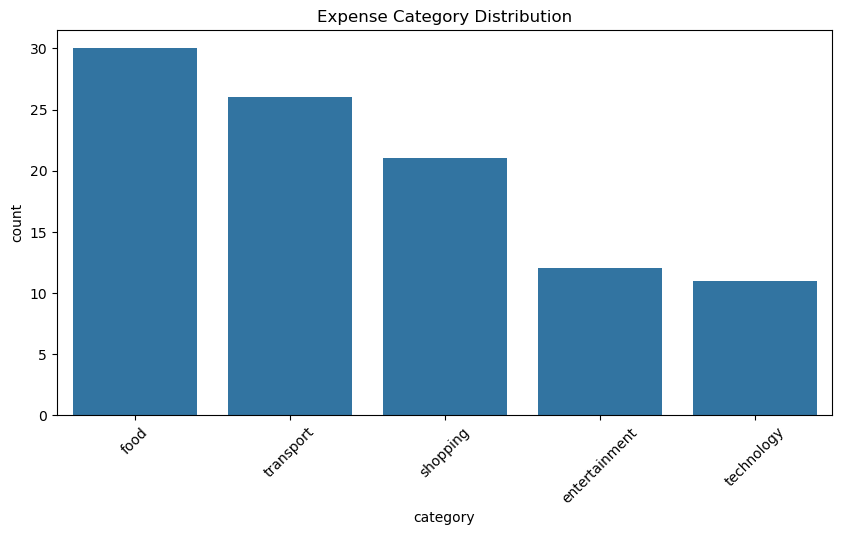

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Expense Category Distribution')
plt.show()

In [6]:
print(df.isnull().sum())


expense_id     0
amount         0
merchant       0
description    0
category       0
dtype: int64


In [7]:
df['text'] = df['merchant'].fillna('') + ' ' + df['description'].fillna('')


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['category'])


In [9]:
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_map)


{'entertainment': np.int64(0), 'food': np.int64(1), 'shopping': np.int64(2), 'technology': np.int64(3), 'transport': np.int64(4)}


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.0
               precision    recall  f1-score   support

entertainment       1.00      1.00      1.00         3
         food       1.00      1.00      1.00         7
     shopping       1.00      1.00      1.00         4
   technology       1.00      1.00      1.00         4
    transport       1.00      1.00      1.00         2

     accuracy                           1.00        20
    macro avg       1.00      1.00      1.00        20
 weighted avg       1.00      1.00      1.00        20



In [28]:
def predict_expense(text):
    vec = vectorizer.transform([text])
    pred = clf.predict(vec)
    return le.inverse_transform(pred)[0]

# Ask user for input
user_input = input("Enter your transaction description: ")

# Predict category
predicted_category = predict_expense(user_input)
print(f"Predicted Expense Category: {predicted_category}")

Enter your transaction description:  Monthly gym membership


Predicted Expense Category: transport


In [31]:
print(df['category'].unique())

['shopping' 'technology' 'food' 'entertainment' 'transport']


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


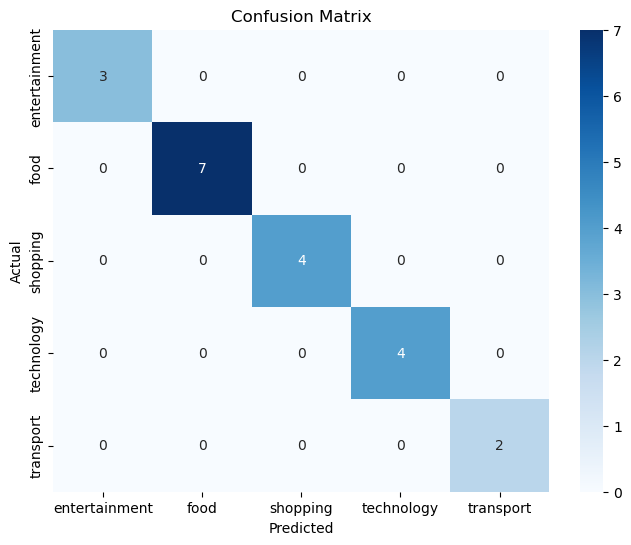

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
df

,expense_id,amount,merchant,description,category,text,label
0,EXP1,78.04,Amazon,fuel purchase,shopping,Amazon fuel purchase,2
1,EXP2,190.39,Apple Store,online shopping,technology,Apple Store online shopping,3
2,EXP3,147.74,McDonald's,app purchase,food,McDonald's app purchase,1
3,EXP4,121.74,Starbucks,meal,food,Starbucks meal,1
4,EXP5,35.42,Netflix,fuel purchase,entertainment,Netflix fuel purchase,0
...,...,...,...,...,...,...,...
95,EXP96,101.29,Amazon,fuel purchase,shopping,Amazon fuel purchase,2
96,EXP97,106.93,Uber,app purchase,transport,Uber app purchase,4
97,EXP98,88.37,Uber,fuel purchase,transport,Uber fuel purchase,4
98,EXP99,9.96,Uber,online shopping,transport,Uber online shopping,4


/var/folders/1y/t6t0l6wj4dq7t57y367jf89c0000gn/T/ipykernel_55405/2028067939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_totals.index, y=category_totals.values, palette='Set1')


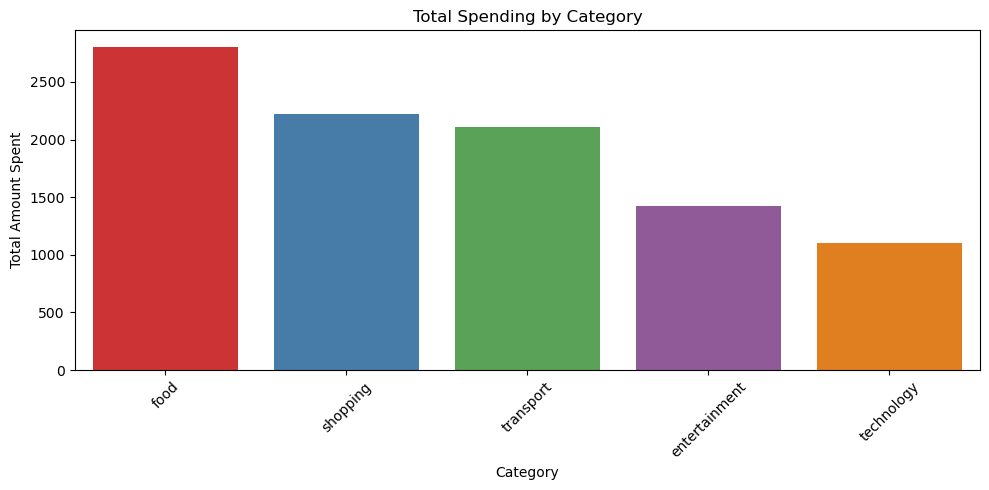

In [32]:
category_totals = df.groupby('category')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_totals.index, y=category_totals.values, palette='Set1')
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/1y/t6t0l6wj4dq7t57y367jf89c0000gn/T/ipykernel_55405/1265290679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg.index, y=category_avg.values, palette='coolwarm')


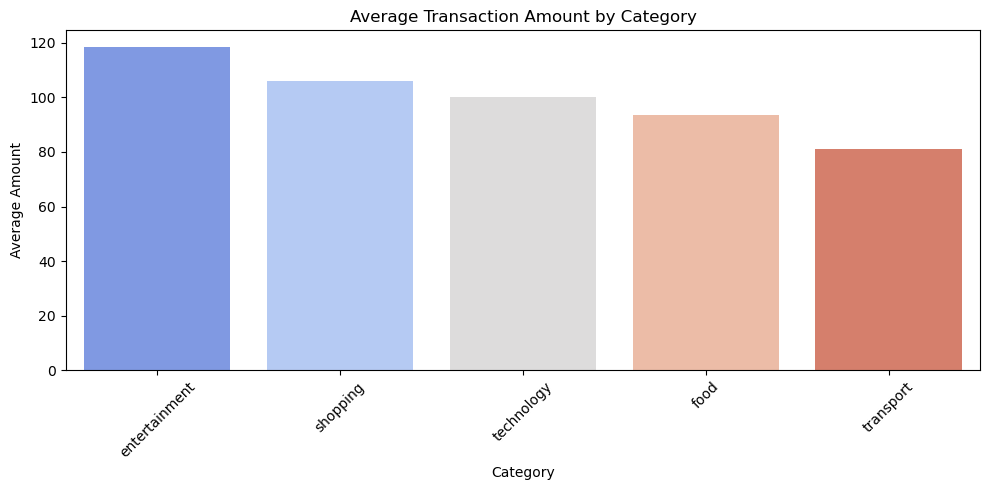

In [33]:
category_avg = df.groupby('category')['amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_avg.index, y=category_avg.values, palette='coolwarm')
plt.title('Average Transaction Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/1y/t6t0l6wj4dq7t57y367jf89c0000gn/T/ipykernel_55405/2553887597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_merchants.index, y=top_merchants.values, palette='pastel')


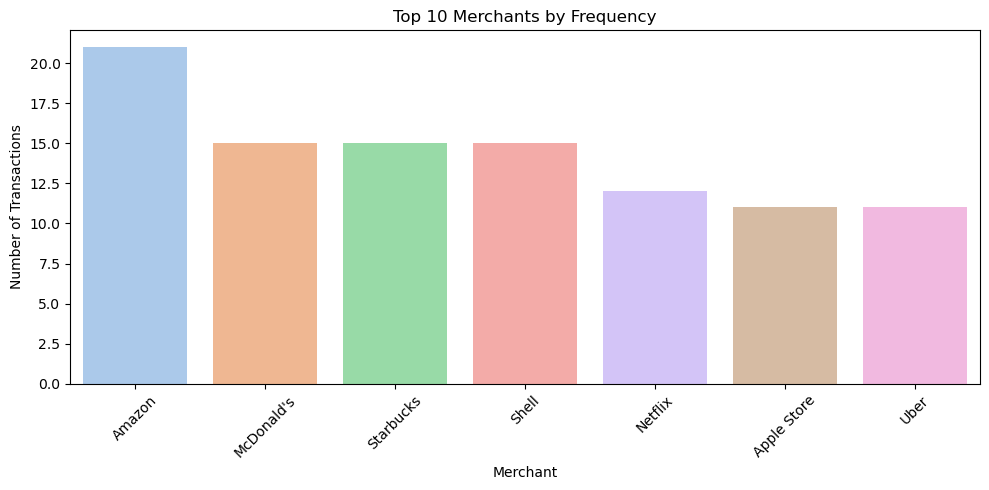

In [34]:
top_merchants = df['merchant'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_merchants.index, y=top_merchants.values, palette='pastel')
plt.title('Top 10 Merchants by Frequency')
plt.xlabel('Merchant')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


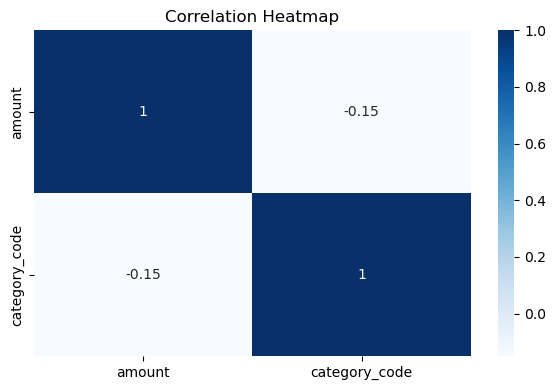

In [35]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()
df_encoded['category_code'] = le.fit_transform(df['category'])

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_encoded[['amount', 'category_code']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


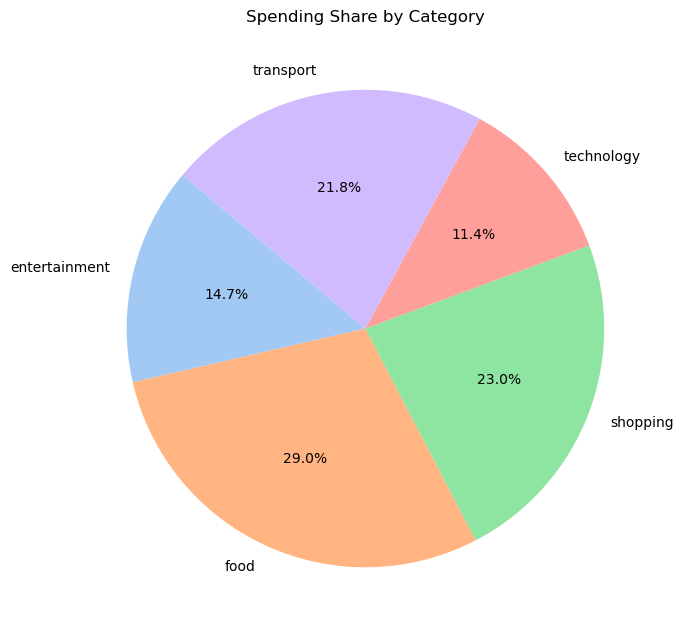

In [36]:
category_totals = df.groupby('category')['amount'].sum()

plt.figure(figsize=(7, 7))
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Spending Share by Category')
plt.tight_layout()
plt.show()
